In [1]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import re

In [2]:
imgPath = "imagens/placa_carro2.jpg"

img = cv2.imread(imgPath)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

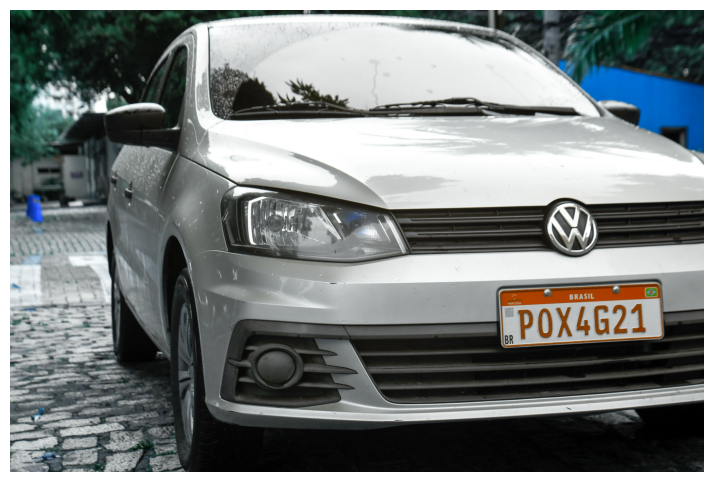

In [3]:
plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(img, cmap='gray');

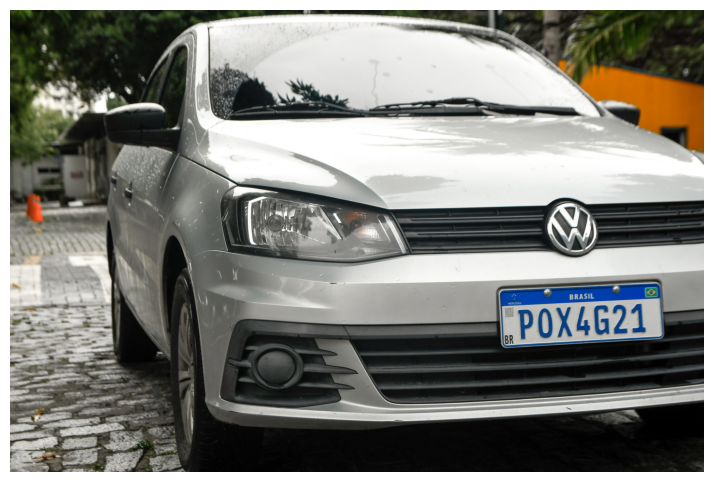

In [4]:
plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(rgb, cmap='gray');

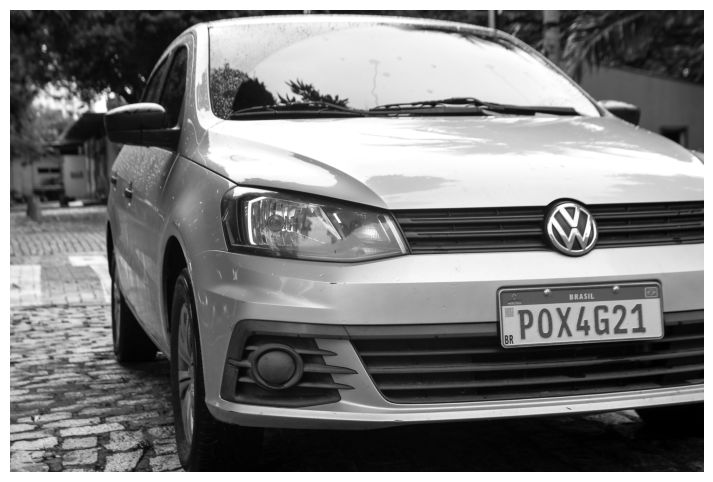

In [5]:
plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(imgGray, cmap='gray');

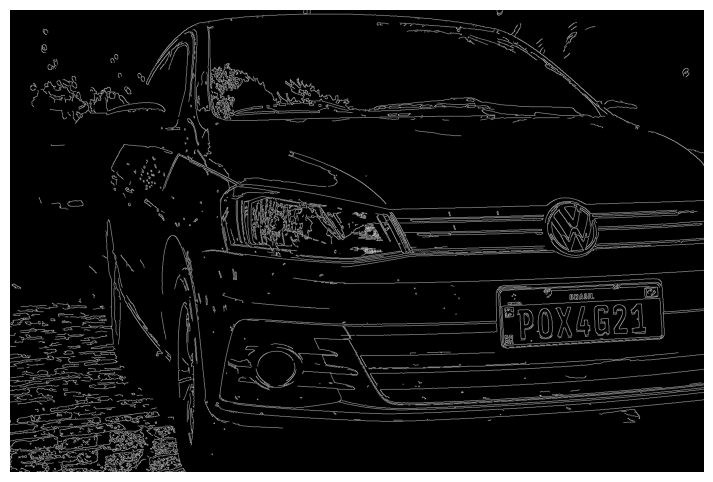

In [6]:
bordas = cv2.Canny(imgGray, 100, 200)

plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(bordas, cmap='gray');

In [14]:
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos = sorted(contornos, key = cv2.contourArea, reverse=True)[:10]
print(contornos)

[array([[[1657,  736]],

       [[1656,  737]],

       [[1636,  737]],

       [[1635,  738]],

       [[1616,  738]],

       [[1615,  739]],

       [[1595,  739]],

       [[1594,  740]],

       [[1576,  740]],

       [[1575,  741]],

       [[1557,  741]],

       [[1556,  742]],

       [[1537,  742]],

       [[1536,  743]],

       [[1516,  743]],

       [[1515,  744]],

       [[1496,  744]],

       [[1495,  745]],

       [[1475,  745]],

       [[1474,  746]],

       [[1456,  746]],

       [[1455,  747]],

       [[1436,  747]],

       [[1435,  748]],

       [[1417,  748]],

       [[1416,  749]],

       [[1396,  749]],

       [[1395,  750]],

       [[1378,  750]],

       [[1377,  751]],

       [[1358,  751]],

       [[1357,  752]],

       [[1339,  752]],

       [[1338,  753]],

       [[1319,  753]],

       [[1318,  754]],

       [[1299,  754]],

       [[1298,  755]],

       [[1279,  755]],

       [[1278,  756]],

       [[1260,  756]],

       [[1259, 

1255
737
406
114


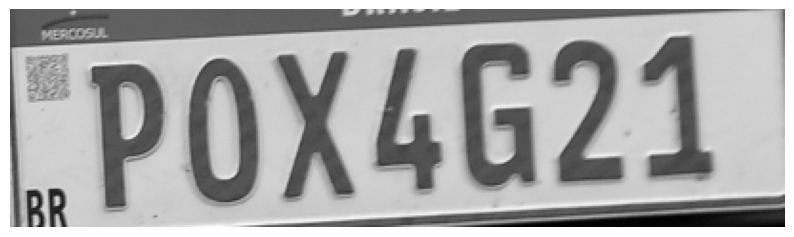

In [15]:
for contorno in contornos:
    epsilon = .02*cv2.arcLength(contorno, True)

    aprox = cv2.approxPolyDP(contorno, epsilon, True)
    
    if (cv2.isContourConvex(aprox)) & (len(aprox) == 4):
        local = aprox
        break
    
x, y, w, h = cv2.boundingRect(local)

print(x)
print(y)
print(w)
print(h)

placa = imgGray[y:y+h, x:x+w]

plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(placa, cmap='gray');

POX4G21


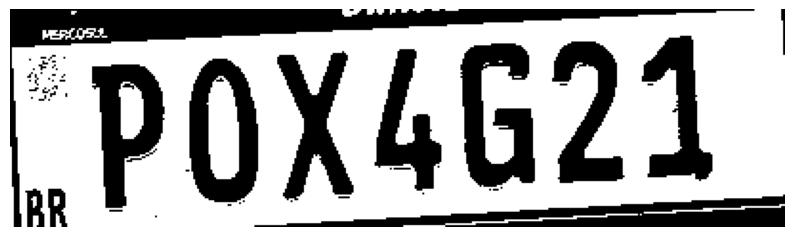

In [21]:
kernel_placa_brasil = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
valor, thresh_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# erode = cv2.erode(thresh_otsu, kernel_placa_brasil)

plt.figure(figsize=(10,6))
plt.axis('off')
plt.imshow(thresh_otsu, cmap='gray');
# plt.imshow(erode, cmap='gray');

config_tesseract = "--tessdata-dir .tessdata --psm 6"
texto = pytesseract.image_to_string(thresh_otsu, lang="por", config=config_tesseract)
# texto = pytesseract.image_to_string(erode, lang="por", config=config_tesseract)

texto_extraido = re.search('\w{3}\d{1}\w{1}\d{2}', texto)

print(texto_extraido.group(0))